# TOT Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.ticker as ticker

# pair_for_adc = [[208, 06], [209, 008], [209, 01]]
# pair_for_tot = [[208, 01], [209, 008], [210, 06]]


fpga_adc = "209"
pb_adc = "01"

fpga_tot = "208"
pb_tot = "01"


## Load the data files

In [13]:
# 1. Configuration Section
CONFIG = { 
     "base_path": "/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test", 
     #"amplitudes": [400, 600, 650, 700, 925, 1450, 1975, 2500], 
     "amplitudes": [400, 925, 1450, 1975, 2500],
     "fpga_address": int(fpga_tot), 
     "runs": 5 
} 
 
# 2. Directory Generator Function 

def generate_all_dirs(config): 
    amplitude_dirs = {} 
    for amp in config["amplitudes"]: 
        amplitude_dirs[amp] = { 
            i: f'{config["base_path"]}/{amp}dac/inj_adc_samples_{config["fpga_address"]}_pb{pb_tot}_76_{amp}_{i+1}.csv' 
            for i in range(config["runs"]) 
        } 
    return amplitude_dirs 

# 3. Initialize All Directories 
all_dirs_tot = generate_all_dirs(CONFIG) 

# 4. Utility Function to Get Specific Path 
def get_path(amplitude, run, dirs_dict=all_dirs_tot): 
    try: 
        return dirs_dict[amplitude][run] 
    except KeyError: 
        raise ValueError(f"No path found for amplitude {amplitude} and run {run}") 

# 5. List All Paths 
def list_all_paths(dirs_dict=all_dirs_tot): 
    return [path for amp_dirs in dirs_dict.values() for path in amp_dirs.values()] 

# Example: Print all paths 
for path in list_all_paths(): 
    print(path) 


/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_208_pb01_76_400_1.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_208_pb01_76_400_2.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_208_pb01_76_400_3.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_208_pb01_76_400_4.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_208_pb01_76_400_5.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_208_pb01_76_925_1.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_208_pb01_76_925_2.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_208_pb01_76_925_3.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_208_pb01_76_92

In [14]:
CONFIG = { 
    "base_path": "/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection", 
    "amplitudes": [100, 200, 300, 400, 450], 
    "fpga_address": int(fpga_adc), 
    "runs": 5 
}
 
# 2. Directory Generator Function 

def generate_all_dirs(config): 
    amplitude_dirs = {} 
    for amp in config["amplitudes"]: 
        amplitude_dirs[amp] = { 
            i: f'{config["base_path"]}/{amp}dac/inj_adc_samples_{config["fpga_address"]}_pb{pb_adc}_76_{amp}_{i+1}.csv' 
            for i in range(config["runs"]) 
        } 
    return amplitude_dirs 

# 3. Initialize All Directories 
all_dirs_adc = generate_all_dirs(CONFIG) 

# 4. Utility Function to Get Specific Path 
def get_path(amplitude, run, dirs_dict=all_dirs_adc): 
    try: 
        return dirs_dict[amplitude][run] 
    except KeyError: 
        raise ValueError(f"No path found for amplitude {amplitude} and run {run}") 

# 5. List All Paths 
def list_all_paths(dirs_dict=all_dirs_adc): 
    return [path for amp_dirs in dirs_dict.values() for path in amp_dirs.values()] 

# Example: Print all paths 
for path in list_all_paths(): 
    print(path) 


/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/100dac/inj_adc_samples_209_pb01_76_100_1.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/100dac/inj_adc_samples_209_pb01_76_100_2.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/100dac/inj_adc_samples_209_pb01_76_100_3.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/100dac/inj_adc_samples_209_pb01_76_100_4.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/100dac/inj_adc_samples_209_pb01_76_100_5.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/200dac/inj_adc_samples_209_pb01_76_200_1.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/200dac/inj_adc_samples_209_pb01_76_200_2.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/200dac/inj_adc_samples_209_pb01_76_200_3.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/200dac/inj_adc_samples_209_pb01_76_200_4.csv
/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/200dac/inj_adc_

## Print the TOT values

### Extract TOT Value

In [15]:
def extract_tot_value(all_dirs, channel):
    amplitudes_list = [] 
    means_list = [] 
    
    for amplitude, runs in all_dirs.items():
        for run_file in runs.values():
            if os.path.exists(run_file):
                # Read the CSV file
                df = pd.read_csv(run_file)
                df.columns = df.columns.str.strip()
                
                # Check for required columns
                if {'Channel', 'ADC', 'TOT_12bit', 'Phase'}.issubset(df.columns):
                    # Filter by the specified channel
                    channel_data = df[df['Channel'] == channel & (~df['Phase'].isin([4, 6, 7]))]
                    # Ensure TOT_12bit is not zero
                    if channel_data.empty:
                        print(f"No data for channel {channel} in {run_file}")
                        continue
                    
                    # Exclude TOT_12bit == 0
                    valid_tot = channel_data[channel_data['TOT_12bit'] != 0]['TOT_12bit']
                    
                    # Compute the mean if there are valid entries
                    if not valid_tot.empty:
                        mean_val = valid_tot.mean()
                        amplitudes_list.append(amplitude)
                        means_list.append(mean_val)
                    else:
                        print(f"No valid TOT_12bit data (non-zero) in {run_file} for channel {channel}")
                else:
                    print(f"Required columns missing in {run_file}")
            else:
                print(f"File not found: {run_file}")
    
    return amplitudes_list, means_list


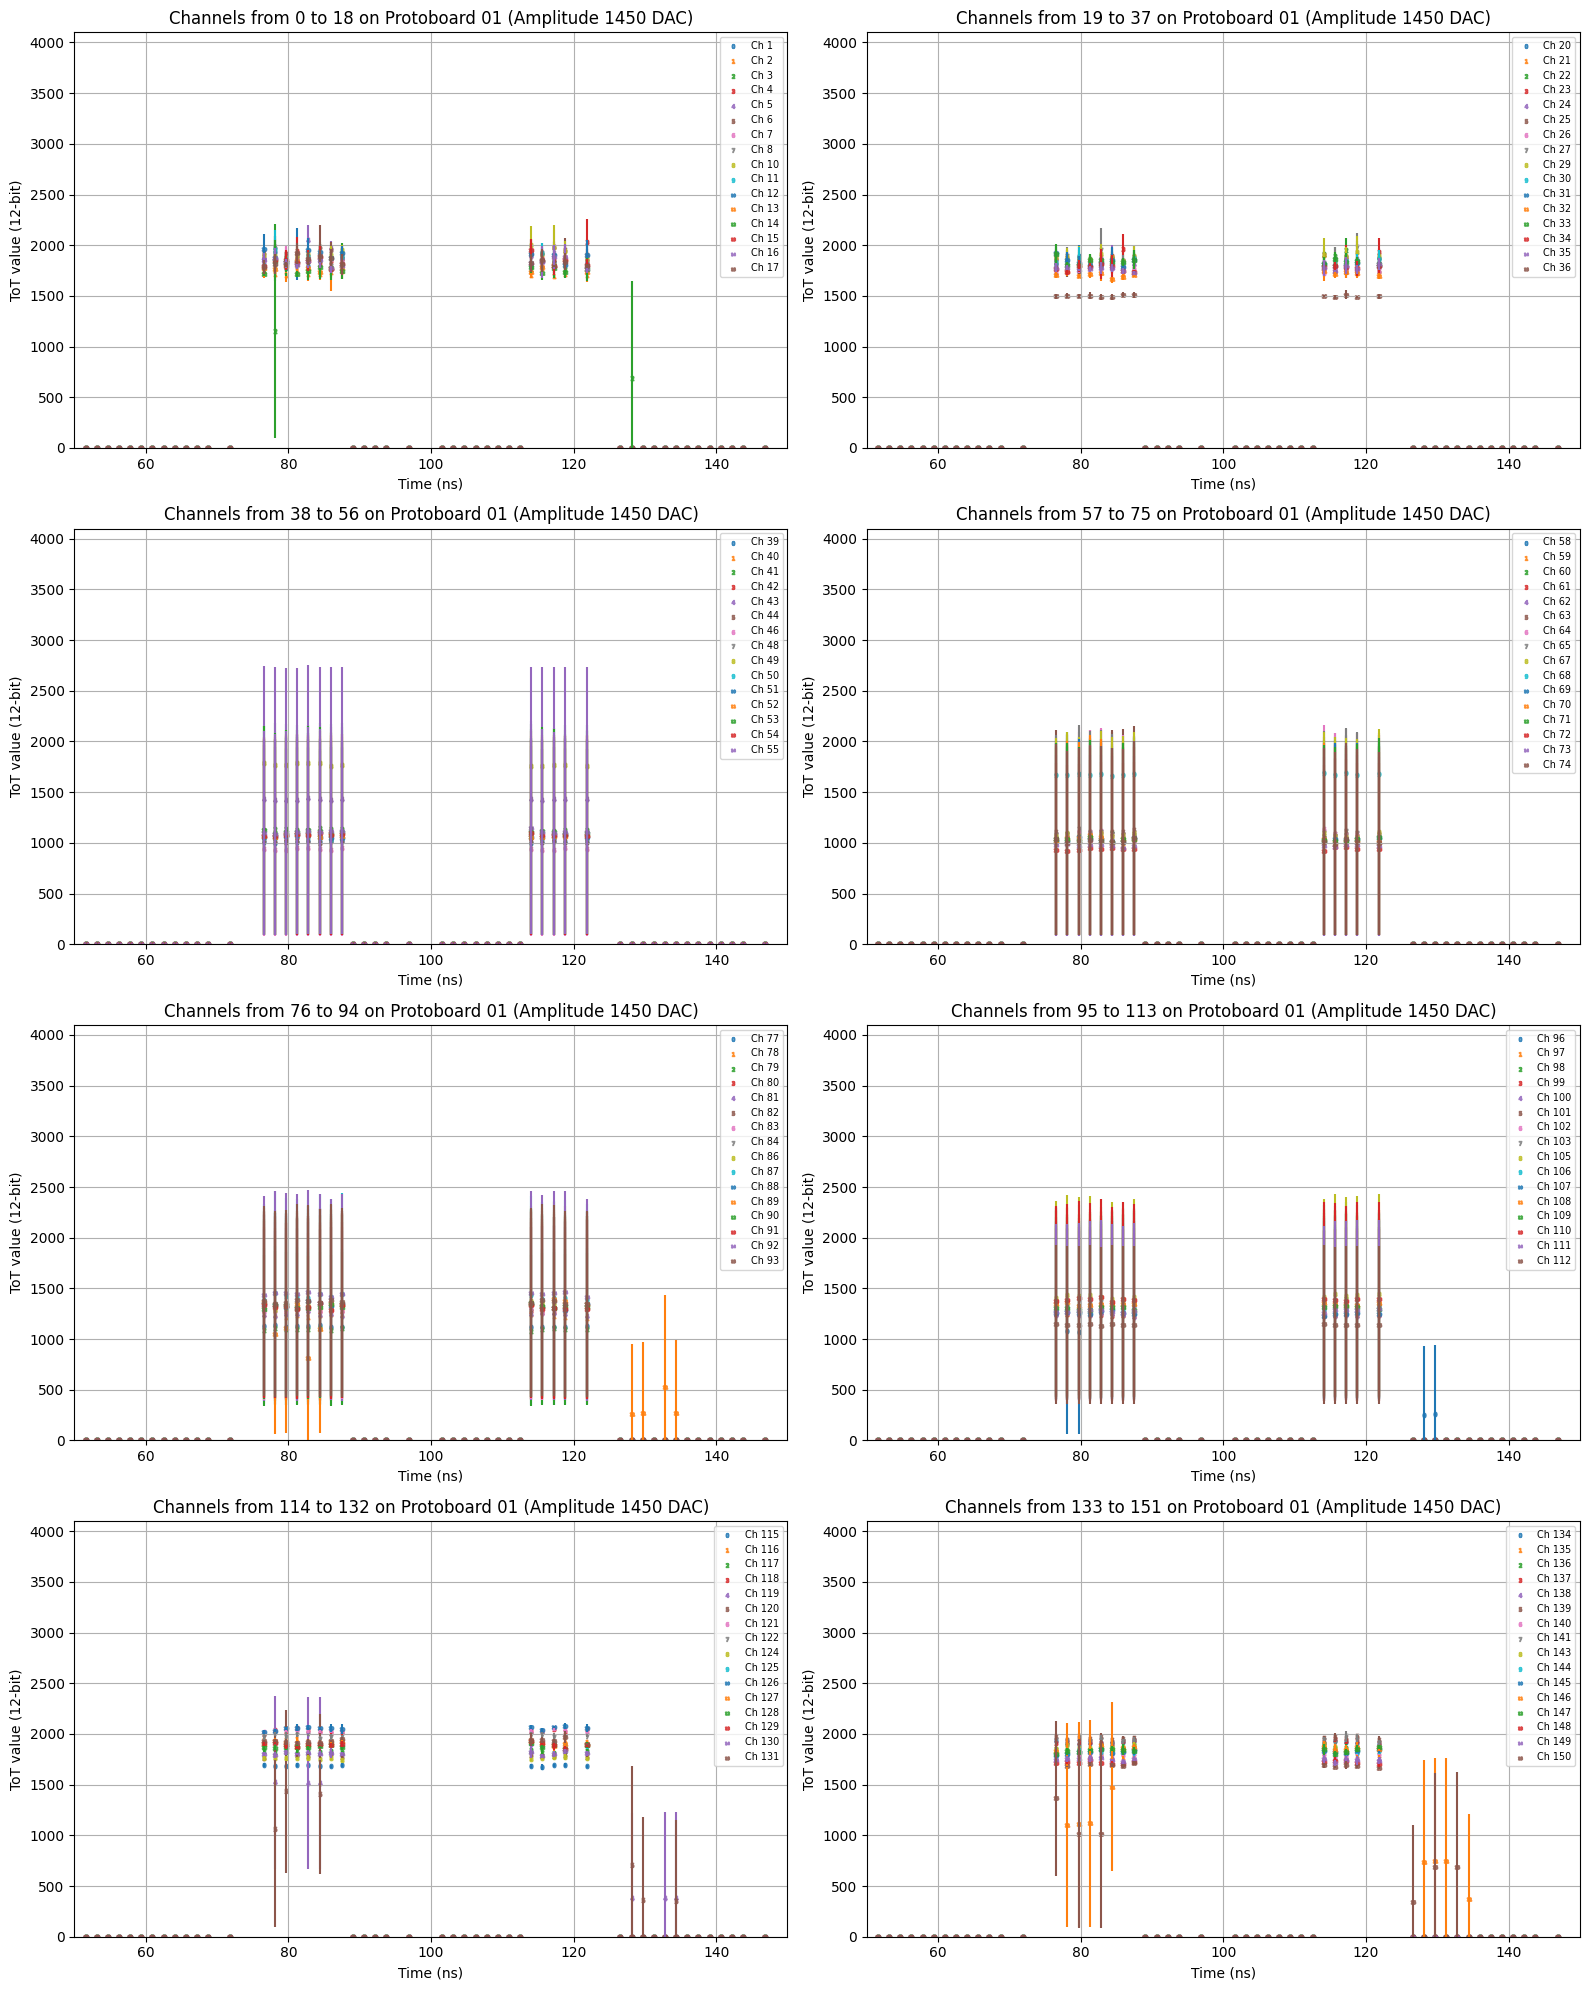

In [16]:
# Specify the amplitude you want to plot
injected_amplitude = 1450  # Replace with the desired amplitude: 400, 925, 1450, 1975, or 2500

# Extract the files for the specified amplitude
run_files = all_dirs_tot.get(injected_amplitude, {})

# Check if the amplitude is valid
if not run_files:
    print(f"No files found for amplitude {injected_amplitude}")
    exit()

# Define sets of channels to skip
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

# Total groups
num_groups = 8
files_per_group = 19
pedestals = 0

# Create a figure with 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 20))
axs = axs.flatten()

approved_tot_channels = []
discarded_tot_channels = []

# Process each channel
for group_id in range(num_groups):
    ax = axs[group_id]
    first_channel = group_id * files_per_group
    last_channel = first_channel + files_per_group
    marker_index = 0

    for channel in range(first_channel, last_channel):
        # Skip unwanted channels
        if channel in dead_channels or channel in calibration_channels or channel in notConnected_channels:
            continue
        
        # Collect data for the current channel across all 5 runs
        all_runs_data = []

        for run_number, file_path in run_files.items():

            # Construct the file path
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue
            
            # Read the data file
            df = pd.read_csv(file_path)
            df.columns = df.columns.str.strip()
            
            # Filter by channel and remove unwanted phases
            channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]
            #channel_data = df[(df['Channel'] == channel)]

            if not channel_data.empty:
                # Collect data
                all_runs_data.append(channel_data[['Time', 'TOT_12bit']])
        
        # If data was collected for all runs, compute the mean
        if all_runs_data:
            # Concatenate all runs for this channel
            combined_data = pd.concat(all_runs_data)
            
            # Compute the mean ToT for each time point
            mean_data = combined_data.groupby('Time')['TOT_12bit'].mean().reset_index()
            #print(mean_data)
            std_data = combined_data.groupby('Time')['TOT_12bit'].std().reset_index()

            # Plot the mean waveform and add std to the legend
            #ax.scatter(mean_data['Time'], mean_data['TOT_12bit'], label=f'Ch {channel} (σ̄={mean_std:.1f})', alpha=0.8, s=10)

            # Plot the mean waveform and capture the color
            points = ax.scatter(mean_data['Time'], mean_data['TOT_12bit'],
                                label=f'Ch {channel}',
                                alpha=0.8, s=10, marker=f'${marker_index}$')

            ax.errorbar(mean_data['Time'], mean_data['TOT_12bit'], yerr=std_data['TOT_12bit'], fmt='', linestyle="None")
            marker_index += 1

    ax.set_title(f'Channels from {first_channel} to {last_channel - 1} on Protoboard {pb_tot} (Amplitude {injected_amplitude} DAC)')
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('ToT value (12-bit)')
    ax.set_ylim(0, 4100)
    ax.set_xlim(50, 150)
    ax.grid(True)
    ax.legend(fontsize='x-small', markerscale=0.9)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_tot}_pb{pb_tot}/04_MeanConnectedChannelsAllRuns_tot_12bit_fpga{fpga_tot}-pb{pb_tot}_{injected_amplitude}DAC.png')


## Find the overall more stable phase

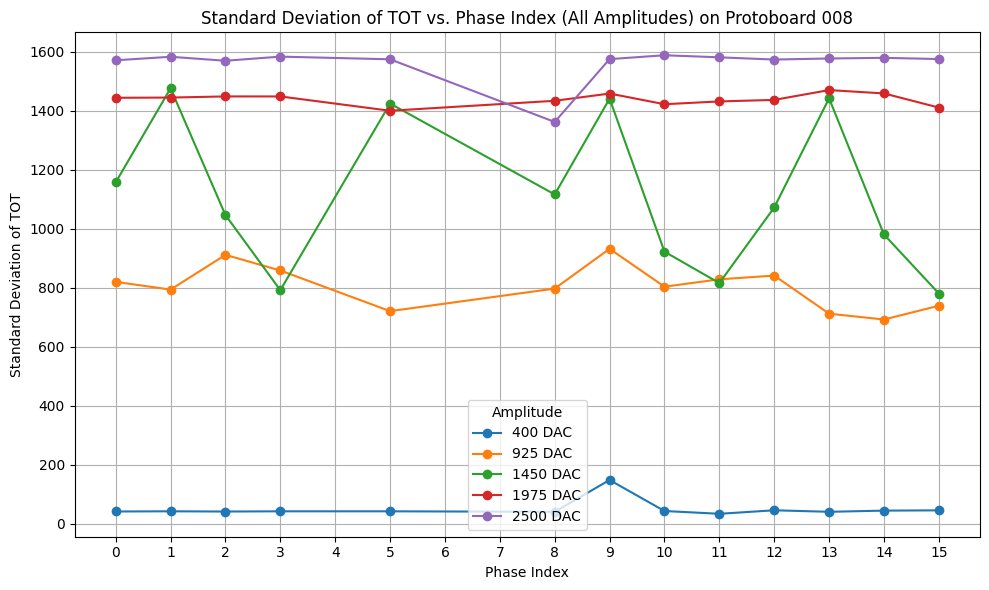

The best phase across all channels and amplitudes is: Phase 15 with a score of 4551.65
The second best phase is: Phase 11 with a score of 4691.44
Best phases in order of score:
Phase 15: 4551.65
Phase 11: 4691.44
Phase 3: 4725.04
Phase 8: 4750.32
Phase 14: 4756.12
Phase 10: 4779.93
Phase 12: 4969.74
Phase 2: 5017.87
Phase 0: 5034.17
Phase 5: 5162.02
Phase 13: 5242.13
Phase 1: 5339.82
Phase 9: 5554.61


In [6]:
# Define constants
sample_time_interval = 25.0
phase_time_interval = 25.0 / 16.0
phase_offset = 7

# Define sets of channels to skip
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

num_groups = 8
files_per_group = 19

# Find the best phase across all channels and amplitudes
phase_score = {i: 0 for i in range(16)}

fig = plt.figure(figsize=(10, 6))

# Loop over all amplitudes
for injected_amplitude, run_files in all_dirs_tot.items():
    tot_by_phase = {i: [] for i in range(16)}  # Reset per amplitude

    for group_id in range(num_groups):
        first_channel = group_id * files_per_group
        last_channel = first_channel + files_per_group

        for channel in range(first_channel, last_channel):
            if channel in dead_channels or channel in calibration_channels or channel in notConnected_channels:
                continue

            for run_number, file_path in run_files.items():
                if not os.path.exists(file_path):
                    continue

                df = pd.read_csv(file_path)
                df.columns = df.columns.str.strip()

                # Exclude unwanted phases
                channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]

                for _, row in channel_data.iterrows():
                    t = row['Time']
                    tot = row['TOT_12bit']
                    if tot == 0:
                        continue

                    phase = int(((t % sample_time_interval) / phase_time_interval) + phase_offset) % 16
                    tot_by_phase[phase].append(tot)

    # Compute std per phase
    std_per_phase = {
        p: np.std(tots) for p, tots in tot_by_phase.items() if len(tots) > 1
    }

    # Prepare plot data
    phases = sorted(std_per_phase.keys())
    std_vals = [std_per_phase[p] for p in phases]

    # Update phase scores
    for phase, std_val in std_per_phase.items():
        phase_score[phase] += std_val

    # Add to shared plot
    plt.plot(phases, std_vals, marker='o', label=f'{injected_amplitude} DAC')
    #plt.errorbar(phases, std_vals, yerr=std_per_phase, fmt='', label=f'{injected_amplitude} DAC')

# Final plot adjustments
plt.title(f'Standard Deviation of TOT vs. Phase Index (All Amplitudes) on Protoboard {pb_tot}')
plt.xlabel('Phase Index')
plt.ylabel('Standard Deviation of TOT')
plt.xticks(range(16))
#plt.ylim(0, 500)
plt.grid(True)
plt.legend(title='Amplitude')
plt.tight_layout()
plt.show()

# Save the plot
fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/best_phase_tot_pb{pb_tot}.png')

# Find the best phase based on the lowest standard deviation without considering the 4, 6, and 7 phases
phase_score = {i: score for i, score in phase_score.items() if i not in [4, 6, 7]}
best_phase = min(phase_score, key=phase_score.get)
print(f"The best phase across all channels and amplitudes is: Phase {best_phase} with a score of {phase_score[best_phase]:.2f}")
print(f'The second best phase is: Phase {sorted(phase_score, key=phase_score.get)[1]} with a score of {phase_score[sorted(phase_score, key=phase_score.get)[1]]:.2f}')
# Show the best phases in order
print("Best phases in order of score:")
for phase in sorted(phase_score, key=phase_score.get):
    print(f"Phase {phase}: {phase_score[phase]:.2f}")


## Extract ToT Value

In [7]:
def extract_tot_value(all_dirs, channel, best_phases_list):
    amplitudes_list = [] 
    means_list = [] 
    std_dev_list = []

    for amplitude, runs in all_dirs.items():
        tot_values = []  # Store valid TOTs for this amplitude

        for run_file in runs.values():
            if not os.path.exists(run_file):
                print(f"File not found: {run_file}")
                continue

            df = pd.read_csv(run_file)
            df.columns = df.columns.str.strip()

            if {'Channel', 'TOT_12bit', 'Phase'}.issubset(df.columns):
                valid_data_found = False

                for phase in best_phases_list:
                    # Filter for the given channel and this candidate phase
                    channel_data = df[(df['Channel'] == channel) & (df['Phase'] == phase)]
                    channel_data = channel_data[channel_data['TOT_12bit'] != 0]  # Exclude zero TOTs

                    if not channel_data.empty:
                        tot_values.extend(channel_data['TOT_12bit'].tolist())
                        valid_data_found = True
                        break  # Use the best valid phase only
                        
                if not valid_data_found:
                    print(f"No valid TOT data for channel {channel} in {run_file} (any best phase)")
                    continue
            else:
                print(f"Missing required columns in {run_file}")

        # After all runs for this amplitude
        if tot_values:
            mean_tot = np.mean(tot_values)
            std_dev_tot = np.std(tot_values)
            amplitudes_list.append(amplitude)
            means_list.append(mean_tot)
            std_dev_list.append(std_dev_tot)
        else:
            print(f"No valid TOT values for channel {channel} at amplitude {amplitude}")

    return amplitudes_list, means_list, std_dev_list


Amplitudes: [400, 925, 1450, 1975, 2500]
Tot value: [np.float64(450.6), np.float64(4088.0), np.float64(2780.8), np.float64(3956.8), np.float64(2350.4)]
Standard Deviations: [np.float64(5.0039984012787215), np.float64(0.0), np.float64(1679.7988451002102), np.float64(262.4), np.float64(1737.624309222221)]


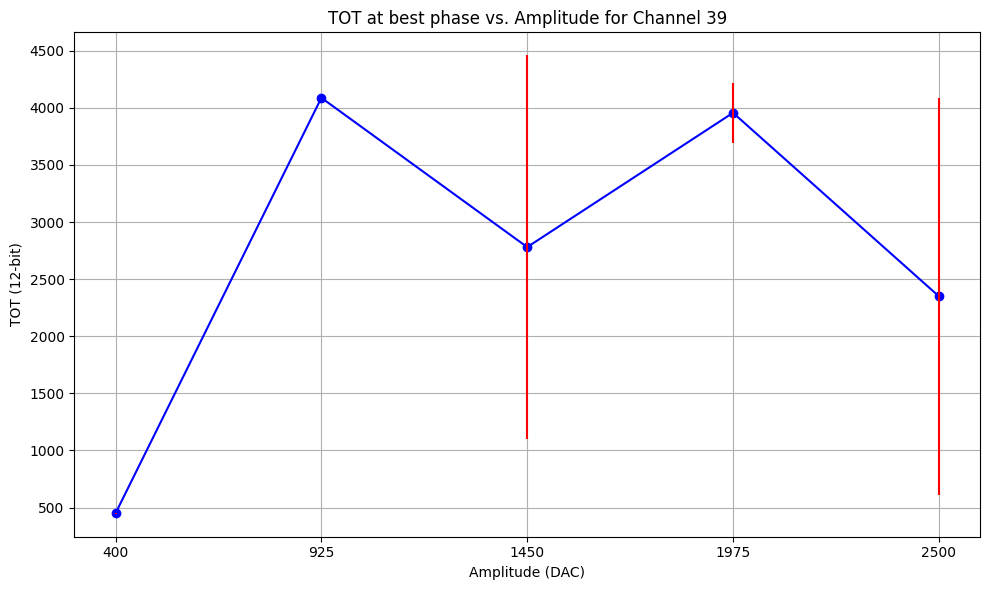

In [8]:
best_phases_list = sorted(phase_score, key=phase_score.get)
amplitudes_list, tot_list, std_dev_list = extract_tot_value(all_dirs_tot, channel=39, best_phases_list=best_phases_list)
# show the results
print("Amplitudes:", amplitudes_list)
print("Tot value:", tot_list)
print("Standard Deviations:", std_dev_list)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(amplitudes_list, tot_list, marker='o', linestyle='-', color='b')
plt.errorbar(amplitudes_list, tot_list, yerr=std_dev_list, fmt='None', color='r', label='Standard Deviation')
plt.title('TOT at best phase vs. Amplitude for Channel 39')
plt.xlabel('Amplitude (DAC)')
plt.ylabel('TOT (12-bit)')
plt.xticks(amplitudes_list)
plt.grid(True)
plt.tight_layout()
plt.show()


### Extract peak ADC, Dynamic Pedestals

In [9]:
def extract_peaks_pedestals_dynamic(all_dirs, channel, pb, pedestal_files, default_pedestals):
    if default_pedestals is None:
        default_pedestals = {}

    if pb not in pedestal_files:
        raise ValueError(f"No pedestal file provided for protoboard {pb}")
    
    pedestal_file_path = pedestal_files[pb]
    if not os.path.exists(pedestal_file_path):
        raise FileNotFoundError(f"Pedestal file for protoboard {pb} not found: {pedestal_file_path}")

    # Load the pedestal file for the current protoboard
    pedestal_df = pd.read_csv(pedestal_file_path)
    pedestal_df.columns = pedestal_df.columns.str.strip()
    pedestal_df = pedestal_df[~pedestal_df['Phase'].isin([4, 6, 7])]
    pedestal_df = pedestal_df[pedestal_df['Channel'] == channel]

    # Check if pedestal data exists for the channel
    pedestal_map = {}
    use_default = False
    default_pedestal = None

    if pedestal_df.empty:
        if pb in default_pedestals and channel in default_pedestals[pb]:
            default_pedestal = default_pedestals[pb][channel]
            use_default = True
            print(f"No pedestal data found for channel {channel} on protoboard {pb}, using calibration pedestal value of {default_pedestal}.")
        else:
            print(f"No pedestal data found for channel {channel} on protoboard {pb}, and no default value specified.")
            return [], []
    else:
        pedestal_map = pedestal_df.set_index('Phase')['ADC'].to_dict()

    amplitudes_list = [] 
    peaks_list = [] 
    
    for amplitude, runs in all_dirs.items():
        for run_file in runs.values():
            if os.path.exists(run_file):
                df = pd.read_csv(run_file)
                df.columns = df.columns.str.strip()

                if {'Channel', 'ADC', 'Phase'}.issubset(df.columns):
                    channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]

                    if not channel_data.empty:
                        if use_default:
                            corrected_adc = channel_data['ADC'] - default_pedestal
                        else:
                            corrected_adc = channel_data.apply(
                                lambda row: row['ADC'] - pedestal_map.get(row['Phase'], 80),
                                axis=1
                            )

                        peak = corrected_adc.max()
                        amplitudes_list.append(amplitude)
                        peaks_list.append(peak)
                else:
                    print(f"Required columns missing in {run_file}")
            else:
                print(f"File not found: {run_file}")
    
    return amplitudes_list, peaks_list


## Plot ADC and TOT together

[170.4 397.4 661.  943.  947. ]
[918. 911. 947. 926. 943. 951. 951. 951. 951. 951. 951. 951. 951. 951.
 951. 951. 951. 951. 951. 951. 951. 951. 951. 951. 951.]
Length of x: 9
Length of means_adc_all: 9
means_adc shape: (5,)
means_adc_over_450 shape: (5,)


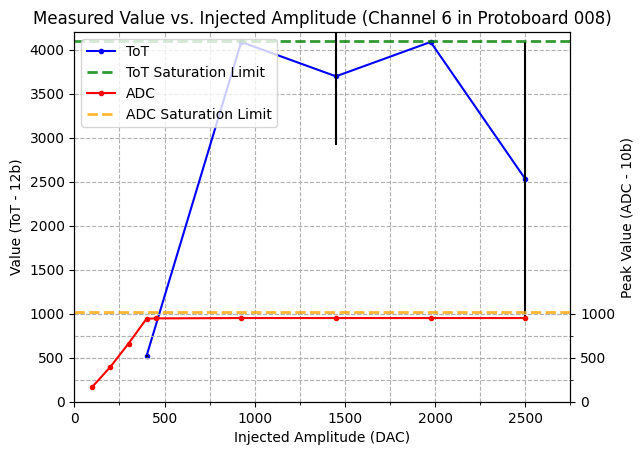

In [10]:
# Pedestal files for each protoboard
pedestal_file_path = {'01': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_208_pb01_76I_0_1.csv', 
                      '008': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_209_pb008_76I_0_1.csv',
                      '06': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_210_pb06_76I_0_1.csv'}

# Default pedestal values for each protoboard from the pedestal calibration files
default_pedestals = {'01': {79: 35, 83: 50, 115: 80, 116: 76, 117: 75},
                     '008': {},
                     '06': {}}


# Define the channel to plot 
pedestals = 80
amplitudes_list, means_list, std_dev_list = extract_tot_value(all_dirs_tot, channel=6, best_phases_list=best_phases_list)
amplitudes_adc, peaks_adc = extract_peaks_pedestals_dynamic(all_dirs_adc, channel=6, pb=pb_adc, pedestal_files=pedestal_file_path, default_pedestals=default_pedestals)
amplitudes_adc_over_450, peaks_adc_over_450 = extract_peaks_pedestals_dynamic(all_dirs_tot, channel=6, pb=pb_adc, pedestal_files=pedestal_file_path, default_pedestals=None)

amplitudes_array = np.array(amplitudes_list)
amplitudes_adc_array = np.array(amplitudes_adc) 
#amplitudes_pC = (amplitudes_array - 193.03)/49 #pC

peaks_tot_np = np.array(means_list)
# means_tot = peaks_tot_np.reshape(-1,8).mean(axis=1)
# std_dev_tot = peaks_tot_np.reshape(-1,8).std(axis=1)
means_tot = peaks_tot_np.reshape(-1,5).mean(axis=1)
std_dev_tot = peaks_tot_np.reshape(-1,5).std(axis=1)

peaks_adc_np = np.array(peaks_adc)
means_adc = peaks_adc_np.reshape(-1,5).mean(axis=1)
print(means_adc)
std_dev_adc = peaks_adc_np.reshape(-1,5).std(axis=1)

peaks_adc_over_450_np = np.array(peaks_adc_over_450)
print(peaks_adc_over_450_np)
means_adc_over_450 = peaks_adc_over_450_np.reshape(-1,5).mean(axis=1)
std_dev_adc_over_450 = np.array([0,0,0,0,0])

means_adc_all = np.concatenate((means_adc, means_adc_over_450), axis=0)
means_adc_all = np.concatenate((means_adc, means_adc_over_450[1:]), axis=0)
std_dev_adc_all = np.concatenate((std_dev_adc, std_dev_adc_over_450[1:]), axis=0)

# Linear regression 
#slope, intercept, r_value, p_value, std_err = linregress(amplitudes_array, peaks) 

# Plotting 
colors = np.random.rand(5)

fig, ax1 = plt.subplots()
line1, = ax1.plot(amplitudes_list, means_list, c='blue', marker=".", label = 'ToT')
ax1.errorbar(amplitudes_list, means_list, yerr=std_dev_list, fmt='', linestyle="None", c='black')
ax1.set_xlabel('Injected Amplitude (DAC)') 
ax1.set_ylabel('Value (ToT - 12b)') 
ax1.set_ylim(0,4200)
ax1.set_xlim(0,2750)
#ax1.grid(True)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(250))

ax1.grid(True, which='both', axis='both', linestyle = '--')

ax2 = ax1.twinx()

print(f"Length of x: {len([100, 200, 300, 400, 450, 925, 1450, 1975, 2500])}")
print(f"Length of means_adc_all: {len(means_adc_all)}")

print(f"means_adc shape: {means_adc.shape}")
print(f"means_adc_over_450 shape: {means_adc_over_450.shape}")

line2, = ax2.plot(np.array([100, 200, 300, 400, 450, 925, 1450, 1975, 2500]), means_adc_all, c='red', marker='.', label = 'ADC')
#ax2.errorbar(np.array([100, 200, 300, 400, 450, 600, 650, 700, 925, 1450, 1975, 2500]), means_adc_all, yerr=std_dev_adc_all, fmt='', linestyle="None", c='black')
ax2.set_ylabel('Peak Value (ADC - 10b)')
ax2.set_ylim(0,4200)

#ticks_to_show = range(0, 1024, 200)
#ax2.set_yticks(ticks_to_show)
#ax2.set_yticklabels(['' for _ in ticks_to_show])

minor_ticks = list(range(0,1024,250))
major_ticks = list(range(0,1024,500))

ax2.set_yticks(major_ticks)
ax2.set_yticks(minor_ticks, minor=True)

ax2.yaxis.grid(True, which='both', linestyle='--')

hline2 = ax2.axhline(y=1024, color='orange', linestyle='--', linewidth = 2, alpha=0.8, label = 'ADC Saturation Limit')
hline1 = ax1.axhline(y=4096, color='green', linestyle='--', linewidth = 2, alpha=0.8, label = 'ToT Saturation Limit')

plt.title(f'Measured Value vs. Injected Amplitude (Channel {6} in Protoboard {pb_tot})')
lines = [line1, hline1, line2, hline2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
plt.show() 

#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_tot}_pb{pb_tot}/06_MeasuredValue_vs_Amplitude_Channel_{channel}_pb{pb_tot}.png')


## Plot for 8 channels

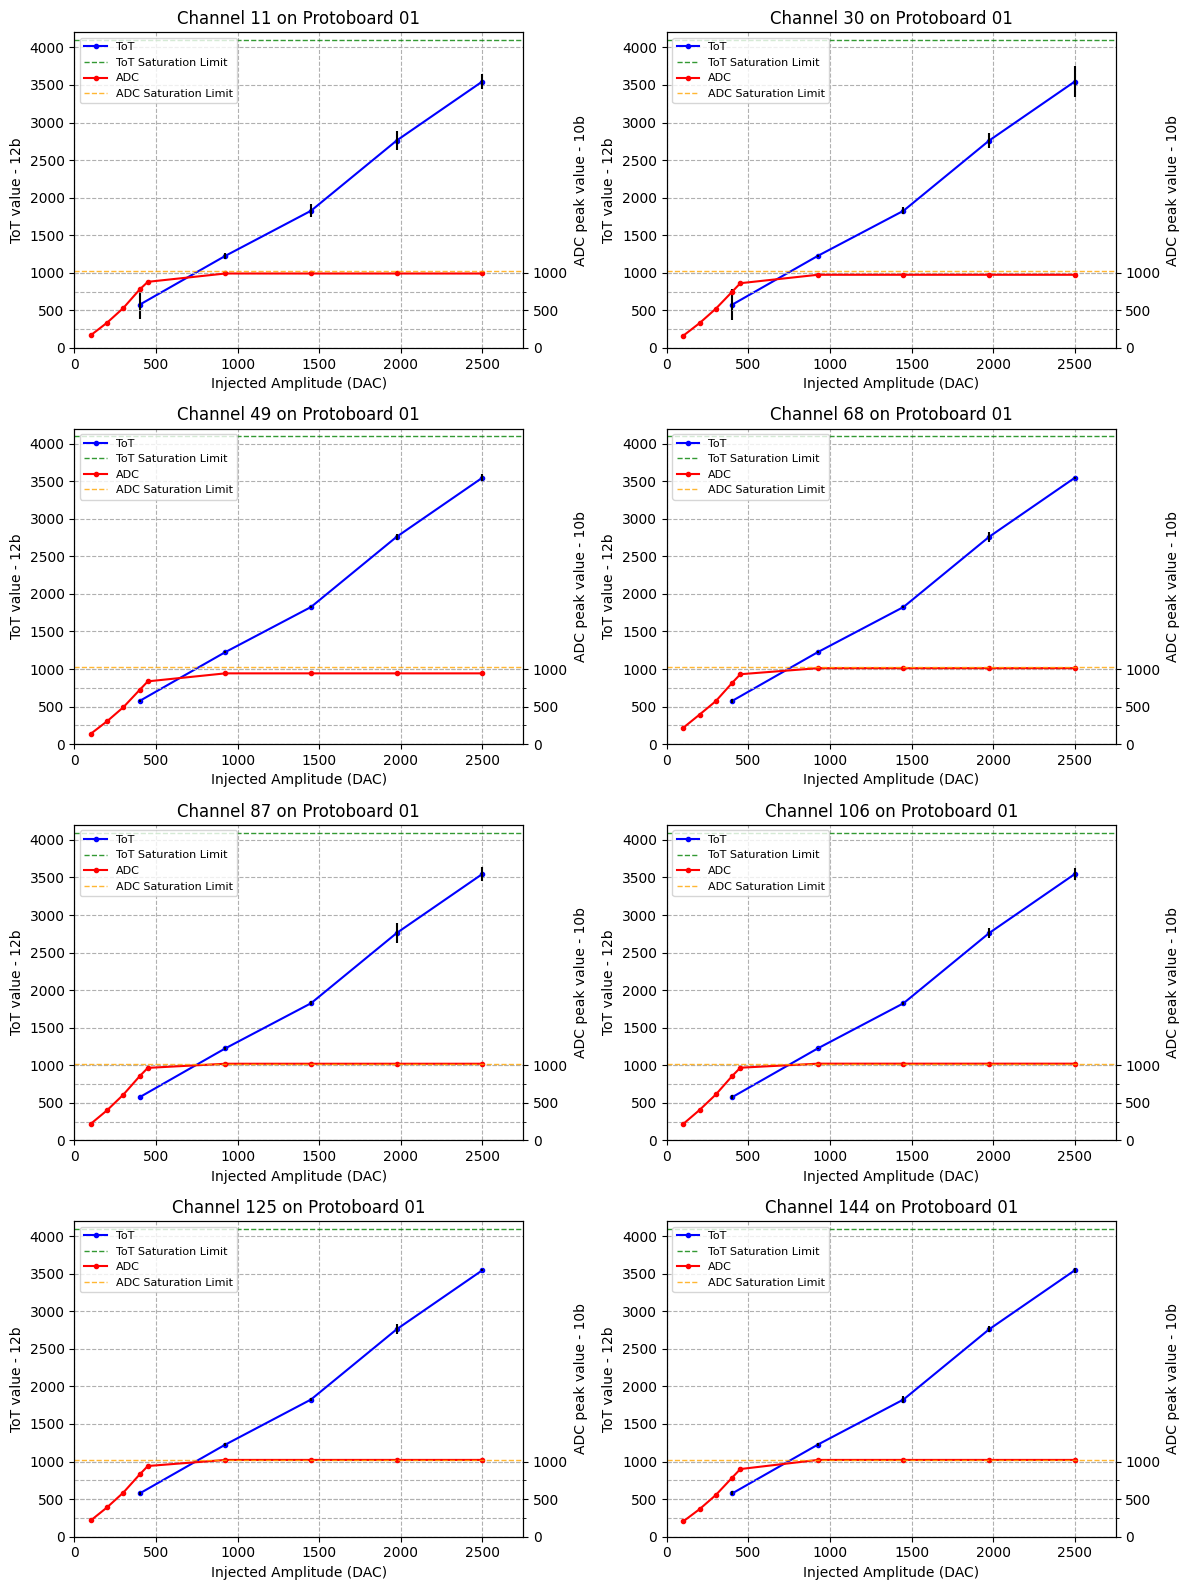

In [11]:
# Pedestal files for each protoboard
pedestal_file_path = {'01': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_208_pb01_76I_0_1.csv', 
                      '008': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_209_pb008_76I_0_1.csv',
                      '06': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_210_pb06_76I_0_1.csv'}

# Default pedestal values for each protoboard from the pedestal calibration files
default_pedestals = {'01': {79: 35, 83: 50, 115: 80, 116: 76, 117: 75},
                     '008': {},
                     '06': {}}

channels = [11, 30, 49, 68, 87, 106, 125, 144]  # Channels to plot

all_means_tot = []
all_amplitudes_list = []

for channel in channels:
    amplitudes_list, means_list, std_dev_list = extract_tot_value(all_dirs_tot, channel=channel, best_phases_list=best_phases_list)
    amplitudes_adc, peaks_adc = extract_peaks_pedestals_dynamic(all_dirs_adc, channel=channel, pb=pb_adc, pedestal_files=pedestal_file_path, default_pedestals=0)
    amplitudes_adc_over_450, peaks_adc_over_450 = extract_peaks_pedestals_dynamic(all_dirs_tot, channel=channel, pb=pb_adc, pedestal_files=pedestal_file_path, default_pedestals=0)

    amplitudes_array = np.array(amplitudes_list)

    peaks_tot_np = np.array(means_list)
    #means_tot = peaks_tot_np.reshape(-1, 5).mean(axis=1)
    means_tot = peaks_tot_np
    std_dev_tot = np.array(std_dev_list)

    peaks_adc_np = np.array(peaks_adc)
    means_adc = peaks_adc_np.reshape(-1, 5).mean(axis=1)
    std_dev_adc = peaks_adc_np.reshape(-1, 5).std(axis=1)

    peaks_adc_over_450_np = np.array(peaks_adc_over_450)
    means_adc_over_450 = peaks_adc_over_450_np.reshape(-1, 5).mean(axis=1)
    std_dev_adc_over_450 = np.array([0, 0, 0, 0, 0])

    means_adc_all = np.concatenate((means_adc, means_adc_over_450[1:]), axis=0)
    std_dev_adc_all = np.concatenate((std_dev_adc, std_dev_adc_over_450[1:]), axis=0)

    all_means_tot.append((amplitudes_list, means_tot, std_dev_tot))
    all_amplitudes_list.append((np.array([100, 200, 300, 400, 450, 925, 1450, 1975, 2500]), means_adc_all, std_dev_adc_all))


fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()  # Flatten to 1D for easy indexing

colors = plt.cm.tab10(np.linspace(0, 1, len(channels)))

for idx, (amplitudes_list, means_tot, std_dev_tot) in enumerate(all_means_tot):
    amplitudes_adc, means_adc_all, std_dev_adc_all = all_amplitudes_list[idx]
    ax = axs[idx]

    # Pick subplot and add twinx
    ax1 = axs[idx]
    ax2 = ax1.twinx()

    # ToT plot on ax1
    ax1.plot(amplitudes_list, peaks_tot_np, c='blue', marker=".", label='ToT')
    ax1.errorbar(amplitudes_list, peaks_tot_np, yerr=std_dev_tot, fmt='', linestyle="None", c='black')
    ax1.set_ylim(0, 4200)
    ax1.set_xlim(0, 2750)
    ax1.set_xlabel('Injected Amplitude (DAC)')
    ax1.set_ylabel('ToT value - 12b', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, which='both', axis='both', linestyle='--')
    ax1.axhline(y=4096, color='green', linestyle='--', linewidth=1, alpha=0.8, label='ToT Saturation Limit')

    # ADC plot on ax2
    ax2.plot([100, 200, 300, 400, 450, 925, 1450, 1975, 2500], means_adc_all, c='red', marker='.', label='ADC')
    ax2.set_ylim(0, 4200)
    ax2.set_ylabel('ADC peak value - 10b', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.axhline(y=1024, color='orange', linestyle='--', linewidth=1, alpha=0.8, label='ADC Saturation Limit')

    minor_ticks = list(range(0,1024,250))
    major_ticks = list(range(0,1024,500))

    ax2.set_yticks(major_ticks)
    ax2.set_yticks(minor_ticks, minor=True)

    ax2.yaxis.grid(True, which='both', linestyle='--')

    # Title and legend
    ax1.set_title(f'Channel {channels[idx]} on Protoboard {pb_tot}')
    lines, labels = [], []
    for ax in [ax1, ax2]:
        line, label = ax.get_legend_handles_labels()
        lines.extend(line)
        labels.extend(label)
    ax1.legend(lines, labels, loc='upper left', fontsize=8)

# Remove unused subplots if fewer than 8 channels
if len(channels) < 8:
    for i in range(len(channels), 8):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/dynamic_range_{pb_tot}.png')


In [12]:
# Pedestal files for each protoboard
pedestal_file_path = {'01': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_208_pb01_76I_0_1.csv', 
                      '008': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_209_pb008_76I_0_1.csv',
                      '06': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_210_pb06_76I_0_1.csv'}

# Default pedestal values for each protoboard from the pedestal calibration files
default_pedestals = {'01': {79: 35, 83: 50, 115: 80, 116: 76, 117: 75},
                     '008': {},
                     '06': {}}

# Define the channel to plot 
channel = 30
pedestals = 80
amplitudes_tot, peaks_tot = extract_tot_value(all_dirs_tot, channel, best_phases_list=best_phases_list)
amplitudes_adc, peaks_adc = extract_peaks_pedestals_dynamic(all_dirs, channel, pb=pb_adc, pedestal_files=pedestal_file_path, default_pedestals=default_pedestals)
amplitudes_adc_over_450, peaks_adc_over_450 = extract_peaks(all_dirs_tot, channel, pedestals)

amplitudes_array = np.array(amplitudes_tot)
amplitudes_adc_array = np.array(amplitudes_adc) 
#amplitudes_pC = (amplitudes_array - 193.03)/49 #pC

peaks_tot_np = np.array(peaks_tot)
means_tot = peaks_tot_np.reshape(-1,5).mean(axis=1)
std_dev_tot = peaks_tot_np.reshape(-1,5).std(axis=1)

peaks_adc_np = np.array(peaks_adc)
means_adc = peaks_adc_np.reshape(-1,5).mean(axis=1)
std_dev_adc = peaks_adc_np.reshape(-1,5).std(axis=1)

peaks_adc_over_450_np = np.array(peaks_adc_over_450)
means_adc_over_450 = peaks_adc_over_450_np.reshape(-1,5).mean(axis=1)
std_dev_adc_over_450 = np.array([0,0,0,0,0])

means_adc_all = np.concatenate((means_adc, means_adc_over_450[1:]), axis=0)
std_dev_adc_all = np.concatenate((std_dev_adc, std_dev_adc_over_450[1:]), axis=0)

# Linear regression 
#slope, intercept, r_value, p_value, std_err = linregress(amplitudes_array, peaks) 

# Plotting 
colors = np.random.rand(5)

fig, ax1 = plt.subplots()
line1, = ax1.plot(np.array([400, 925, 1450, 1975, 2500]), means_tot, c='blue', marker=".", label = 'ToT')
ax1.errorbar(np.array([400, 925, 1450, 1975, 2500]), means_tot, yerr=std_dev_tot, fmt='', linestyle="None", c='black')
ax1.set_xlabel('Injected Amplitude (DAC)') 
ax1.set_ylabel('Peak Value (ToT - 12b)') 
ax1.set_ylim(0,4200)
ax1.set_xlim(0,2750)
#ax1.grid(True)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(250))

ax1.grid(True) 
peaks_tot_np = np.array(means_list)
means_tot = peaks_tot_np.reshape(-1,5).mean(axis=1)
std_dev_tot = peaks_tot_np.reshape(-1,5).std(axis=1)

peaks_adc_np = np.array(peaks_adc)
#means_adc = peaks_adc_np.reshape(-1,5).mean(axis=1) which='both', axis='both', linestyle = '--' 
means_adc = peaks_adc_np.reshape(-1,5).mean(axis=1)

ax2 = ax1.twinx()

line2, = ax2.plot(np.array([100, 200, 300, 400, 450, 925, 1450, 1975, 2500]), means_adc_all, c='red', marker='.', label = 'ADC')
ax2.errorbar(np.array([100, 200, 300, 400, 450, 925, 1450, 1975, 2500]), means_adc_all, yerr=std_dev_adc_all, fmt='', linestyle="None", c='black')
ax2.set_ylabel('Peak Value (ADC - 10b)')
ax2.set_ylim(0,4200)

#ticks_to_show = range(0, 1024, 200)
#ax2.set_yticks(ticks_to_show)
#ax2.set_yticklabels(['' for _ in ticks_to_show])

minor_ticks = list(range(0,1024,250))
major_ticks = list(range(0,1024,500))

ax2.set_yticks(major_ticks)
ax2.set_yticks(minor_ticks, minor=True)

ax2.yaxis.grid(True, which='both', linestyle='--')

hline2 = ax2.axhline(y=1024, color='orange', linestyle='--', linewidth = 2, alpha=0.8, label = 'ADC Saturation Limit')
hline1 = ax1.axhline(y=4096, color='green', linestyle='--', linewidth = 2, alpha=0.8, label = 'ToT Saturation Limit')

plt.title(f'Peak Value vs. Injected Amplitude (Channel {channel} in Protoboard {pb_tot})')
lines = [line1, hline1, line2, hline2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
plt.show() 


ValueError: too many values to unpack (expected 2)

## Check TOT Linearity

No valid TOT data for channel 77 in /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb008_76_925_1.csv (any best phase)
No valid TOT data for channel 78 in /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb008_76_925_1.csv (any best phase)
No valid TOT data for channel 79 in /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb008_76_925_1.csv (any best phase)
No valid TOT data for channel 80 in /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb008_76_925_1.csv (any best phase)
No valid TOT data for channel 81 in /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb008_76_925_1.csv (any best phase)
No valid TOT data for channel 82 in /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb008_76_925_1.csv (any best phase)
No v

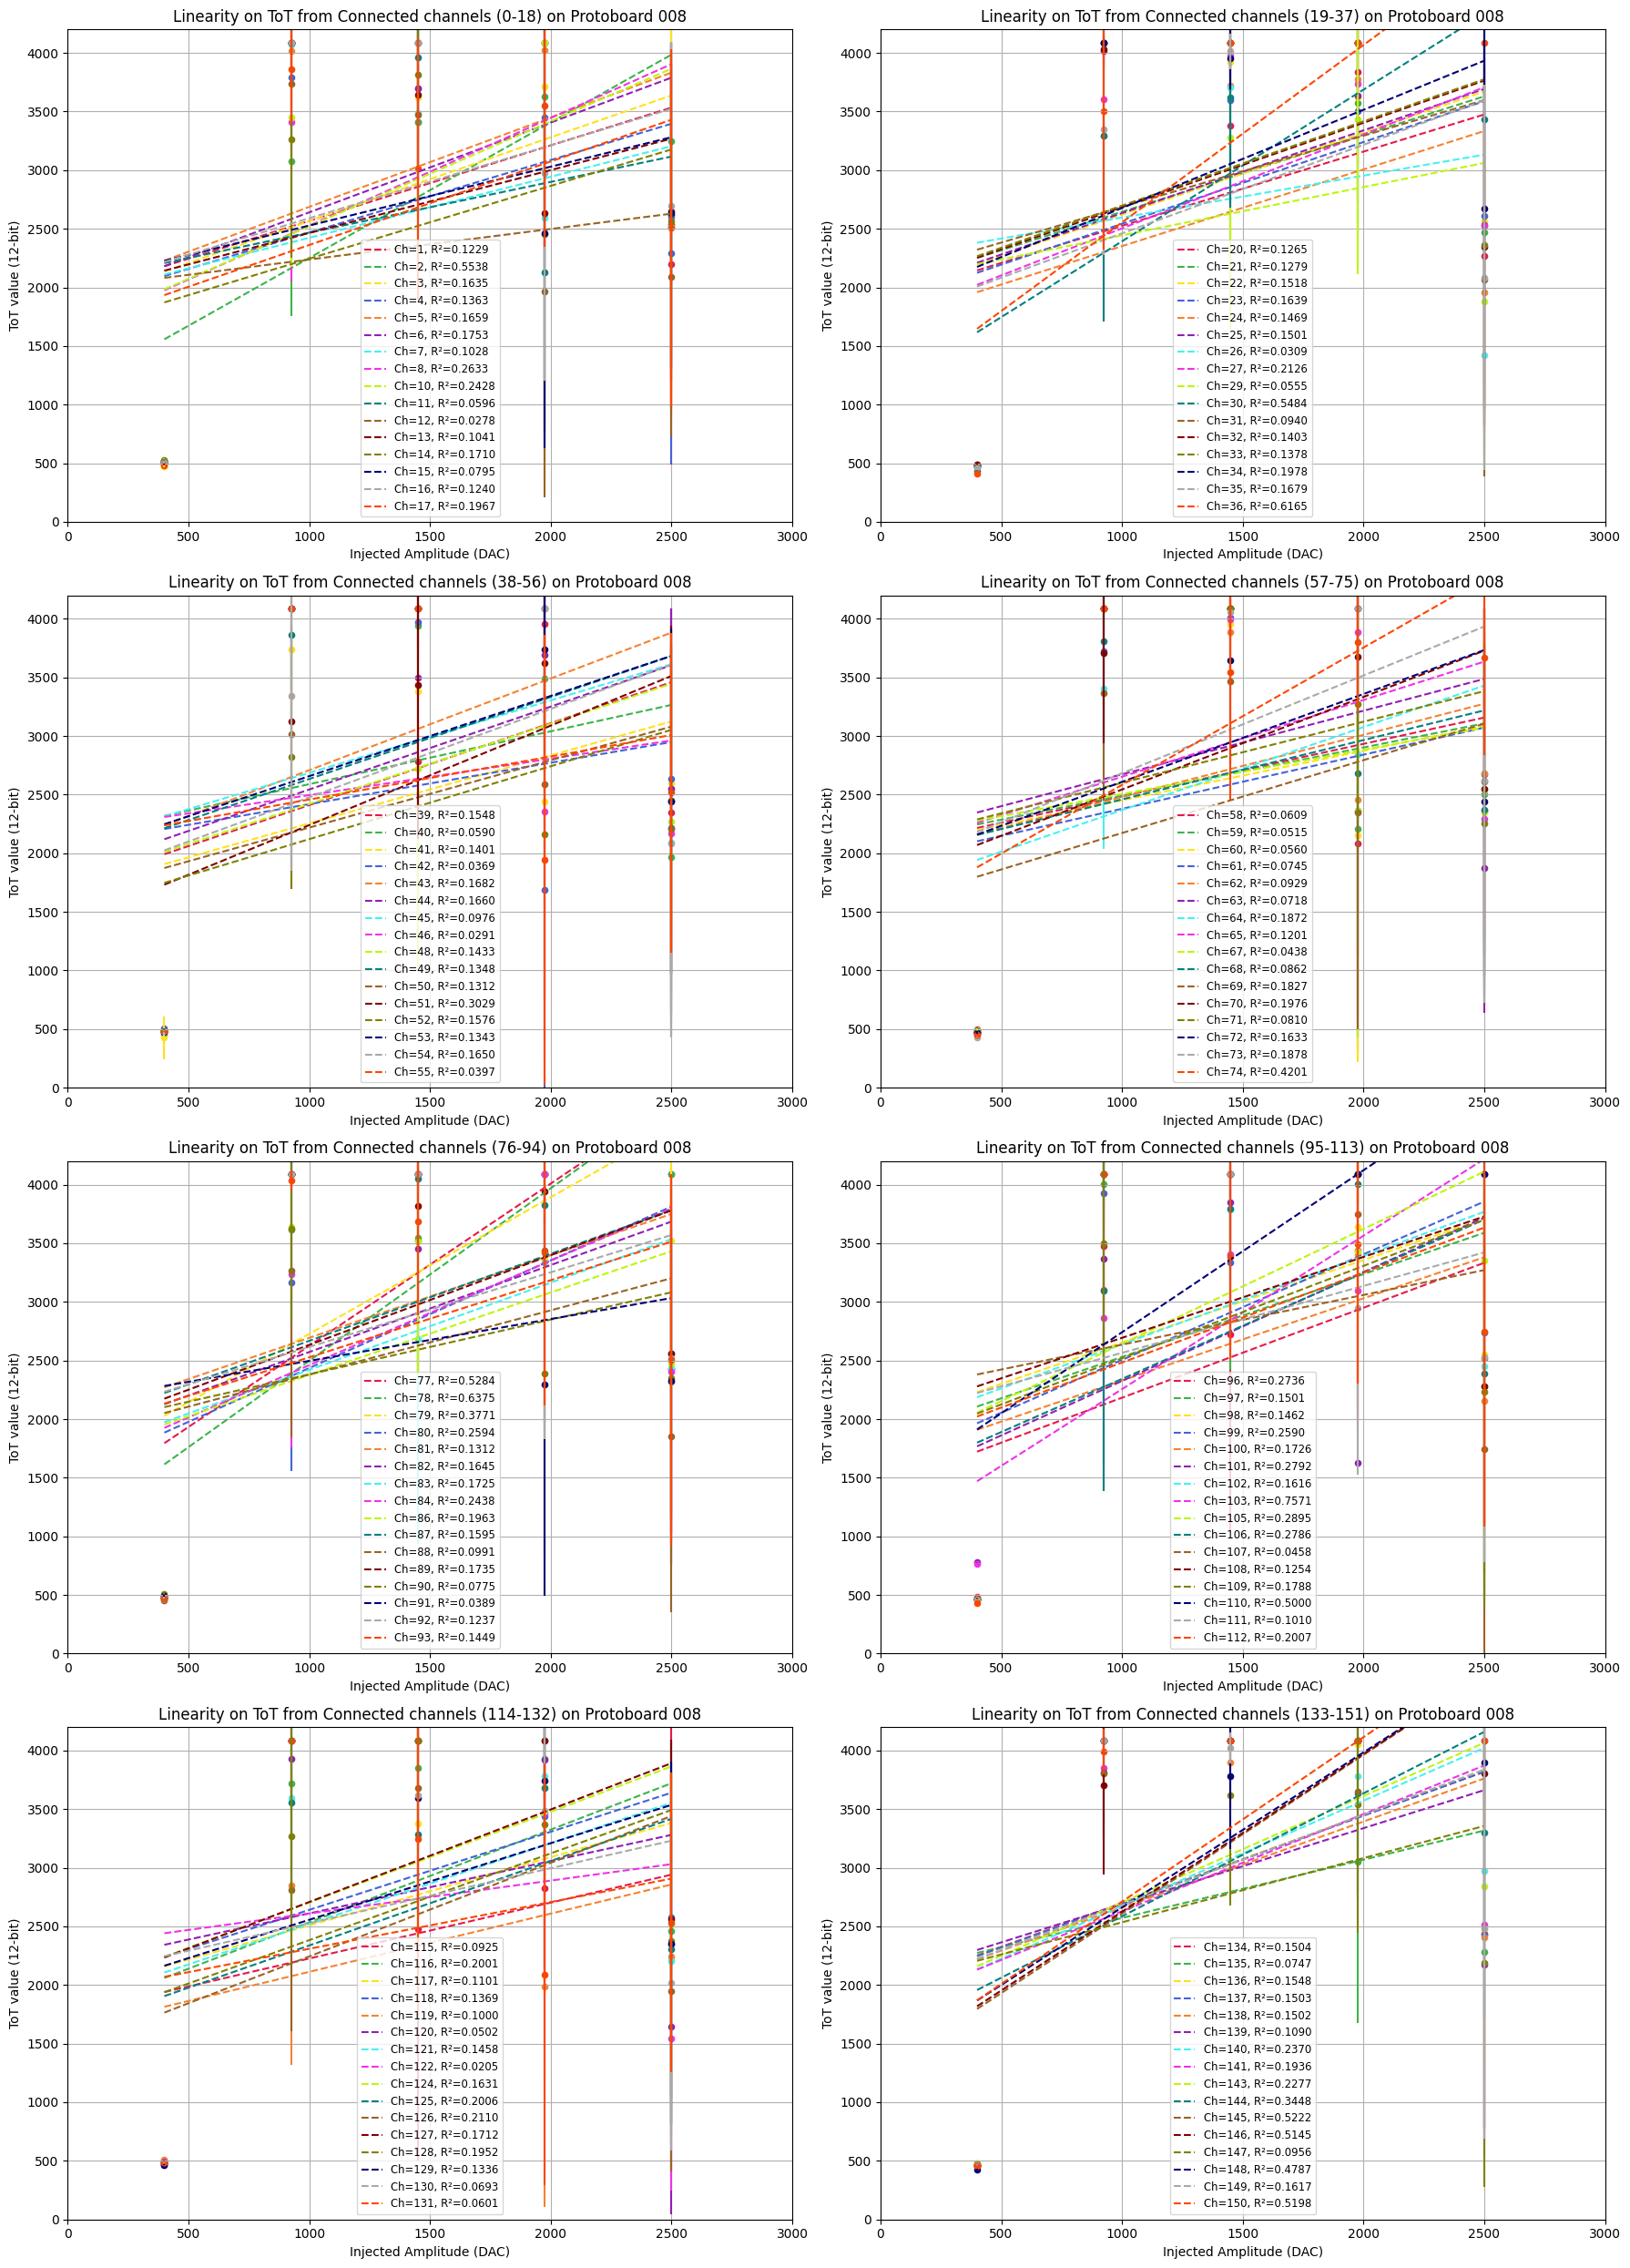


🟢 Good Linearity Channels (0 channels):


🔴 Bad Linearity Channels (128 channels):
1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150

Percentage of Good Linearity Channels: 0.00%


In [11]:
plt.style.use('default')
# Create a figure with 4x2 subplots 
fig, axs = plt.subplots(4, 2, figsize=(18, 25)) 
axs = axs.flatten() 

# Marker styles to cycle through 
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|'] 

line_colors = [
    "#e6194b",  # Red
    "#3cb44b",  # Green
    "#ffe119",  # Yellow
    "#4363d8",  # Blue
    "#f58231",  # Orange
    "#911eb4",  # Purple
    "#46f0f0",  # Cyan
    "#f032e6",  # Magenta
    "#bcf60c",  # Lime
    "#008080",  # Teal
    "#9a6324",  # Brown
    "#800000",  # Maroon
    "#808000",  # Olive
    "#000075",  # Navy
    "#a9a9a9",  # Dark Gray
    "#ff4500",  # Orange Red
    "#228b22",  # Forest Green
    "#1e90ff",  # Dodger Blue
    "#8b008b",  # Dark Magenta
]


# Define sets of channels to skip 
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

# Total groups 
num_groups = 8 
files_per_group = 19

colors = np.random.rand(19)

pedestals = 80

best_phases_list = sorted(phase_score, key=phase_score.get)

good_linearity_channels = []
bad_linearity_channels = []

# Loop over 8 groups 
for group_id in range(num_groups):
    j=1
    ax = axs[group_id]  # Select subplot 
    first_channel = group_id * files_per_group 
    last_channel = first_channel + files_per_group 
    marker_index = 0 
    j = 0

    for i in range(first_channel, last_channel): 
        if i in dead_channels or i in notConnected_channels or i in calibration_channels: 
            #print(f"Skipping channel: {i}") 
            continue 

        amplitudes, value, std_dev = extract_tot_value(all_dirs_tot, channel=i, best_phases_list=best_phases_list)

        # Converting amplitude to C 
        amplitudes_array = np.array(amplitudes) 

        # Linear regression
        # If its not empty, perform linear regression
        if len(amplitudes_array) == 0 or len(value) == 0:
            print(f"No data for channel {i} with amplitudes {amplitudes} and values {value}")
            continue

        slope, intercept, r_value, p_value, std_err = linregress(amplitudes_array, value) 
        
        ax.scatter(amplitudes, value, s=20, c=line_colors[j % len(line_colors)], marker='o')
        ax.errorbar(amplitudes, value, yerr=std_dev, fmt='', linestyle="None", c=line_colors[j % len(line_colors)])
        ax.plot(amplitudes_array, slope*amplitudes_array + intercept, linestyle="--", color=line_colors[j % len(line_colors)], label=f'Ch={i}, R²={r_value**2:.4f}') 
        if r_value**2 >= 0.97:
            good_linearity_channels.append(i)
        else:
            bad_linearity_channels.append(i)
        
        j += 1
        marker_index += 1
        
    ax.set_title(f'Linearity on ToT from Connected channels ({first_channel}-{last_channel - 1}) on Protoboard {pb_tot}') 
    ax.set_xlabel('Injected Amplitude (DAC)') 
    ax.set_ylabel('ToT value (12-bit)') 
    ax.set_ylim(0, 4200)
    ax.set_xlim(0,3000)
    ax.grid(True) 
    ax.legend(fontsize='small',markerscale=1)
    #ax.legend()

# Adjust layout 
plt.tight_layout() 
plt.show()
#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_tot}_pb{pb_tot}/01_linearity_tot_pb{pb_tot}.png')

# Output function to print channel lists
def print_channel_list(label, channels):
    print(f"\n{label} ({len(channels)} channels):")
    print(", ".join(str(int(c)) for c in sorted(channels)))
# Display the results
print_channel_list("🟢 Good Linearity Channels", good_linearity_channels)
print_channel_list("🔴 Bad Linearity Channels", bad_linearity_channels)

# Percerntage of good linearity channels
total_channels = 128
percentage_good = (len(good_linearity_channels) / total_channels) * 100 if total_channels > 0 else 0
print(f"\nPercentage of Good Linearity Channels: {percentage_good:.2f}%")


### Manually Discarded Channels (Unstable, Noisy, Unwanted, etc.)

In [ ]:
add_discard(pair_id_mean, 21, 39, 90, 96)

print(manual_discarded_by_pair)